In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display, HTML
import warnings
warnings.filterwarnings('ignore')

First we load the data

In [2]:
panama_entity = pd.read_csv('./Data/panama_papers.nodes.entity.csv')

In [3]:
## Any duplicated row?
panama_entity[panama_entity.duplicated()==True].shape[0]
# no duplicate row

## Features:
panama_entity.columns

## Convert feature:'n.incorporation_date' to type date
panama_entity['n.incorporation_date'] = pd.to_datetime(panama_entity['n.incorporation_date'])
# this conversion is essential, it let us do sorting. 

* **Dataset Size:**
    - rows: 213634
    - features: 18



* **'labels(n)':** "Entity"
* **'n.valid_until':** 'The Panama Papers data is current through 2015'
* **'n.country_codes':** 159 countries'code (exp: HKG for Hong Kong)
* **'n.countries':** 159 countries'fullname 
* **'n.node_id':** node'id
* **'n.sourceID':** 'Panama Papers'
* **'n.address':** 18602 adress
* **'n.name':** 206525 names
* **'n.jurisdiction_description':** 21 jurisdictions'name

In [117]:
panama_entity['n.jurisdiction_description'].unique()

array(['Samoa', 'Panama', 'Nevada', 'United Kingdom', 'Singapore',
       'Ras Al Khaimah', 'Isle Of Man', 'British Anguilla', 'Seychelles',
       'Niue', 'Uruguay', 'British Virgin Islands', 'Hong Kong',
       'New Zealand', 'Bahamas', 'Cyprus', 'Malta', 'Belize', 'Jersey',
       'Wyoming', 'Costa Rica'], dtype=object)

* **'n.service_provider':** 'Mossack Fonseca'
* **'n.jurisdiction':** 21 jurisdictions'code
* **'n.closed_date':** NaN  
* **'n.incorporation_date':** 9493 incorporation'date between ['1936','2015']
* **'n.ibcRUC':** 120046 
* **'n.type':** NaN
* **'n.status':** Status 
* **'n.company_type':** NaN
* **'n.note':** Notes

We make some plot to help us understand the data.

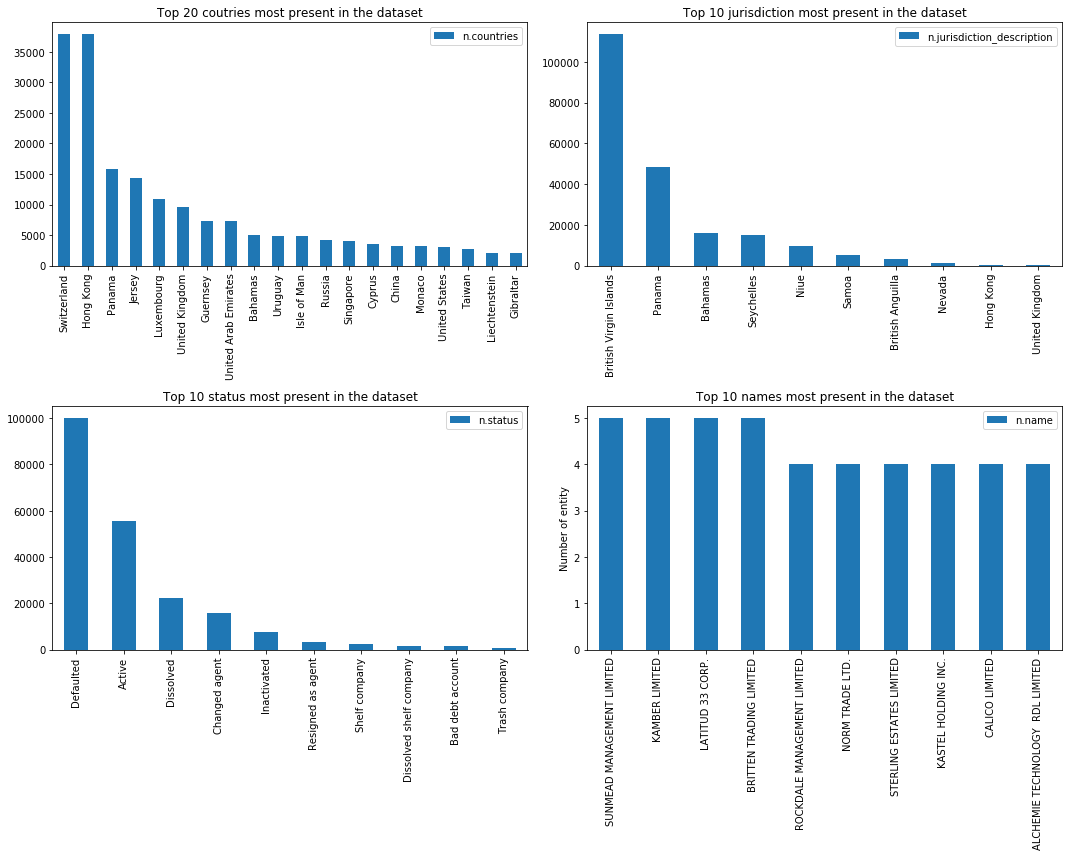

In [5]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,12))


countries = pd.DataFrame(panama_entity['n.countries'].value_counts())
countries[:20].plot(kind='bar',title='Top 20 coutries most present in the dataset',ax=axes[0,0])
plt.ylabel('Number of entity')

jurisdiction = pd.DataFrame(panama_entity['n.jurisdiction_description'].value_counts())
jurisdiction[:10].plot(kind='bar',title='Top 10 jurisdiction most present in the dataset',ax=axes[0,1])
plt.ylabel('Number of entity')

status = pd.DataFrame(panama_entity['n.status'].value_counts())
status[:10].plot(kind='bar',title='Top 10 status most present in the dataset',ax=axes[1,0])
plt.ylabel('Number of entity')

names = pd.DataFrame(panama_entity['n.name'].value_counts())
names[:10].plot(kind='bar',title='Top 10 names most present in the dataset',ax=axes[1,1])
plt.ylabel('Number of entity')

plt.tight_layout()

plt.show()

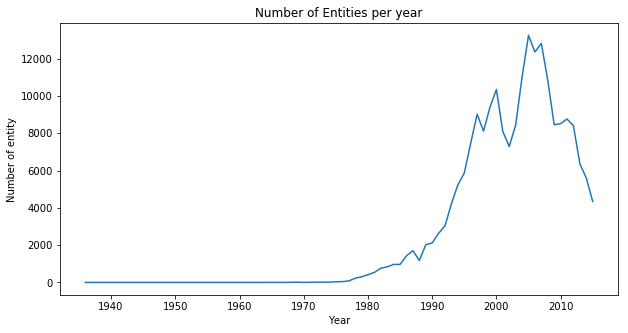

In [6]:
year = pd.DataFrame(panama_entity['n.incorporation_date'].dropna().dt.year.astype(int).value_counts())
plt.figure(figsize=(10,5))
plt.plot(year['n.incorporation_date'].sort_index())
plt.xlabel('Year')
plt.ylabel('Number of entity')
plt.title('Number of Entities per year')
plt.show()

** At year 2005, there was almost 13246 entities but something happened which decreased number of entities after this year  **

In [7]:
evolution_feature_year = panama_entity[['n.incorporation_date','n.countries','n.jurisdiction_description','n.status']]
evolution_feature_year.dropna(subset = ['n.incorporation_date'], inplace=True)
evolution_feature_year['n.incorporation_date'] = evolution_feature_year['n.incorporation_date'].dt.year.astype(int)
evolution_feature_year['count'] = 1

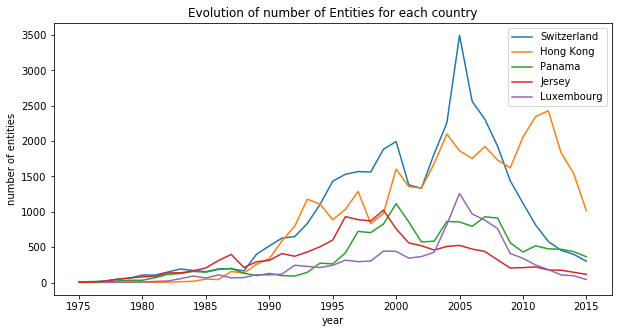

In [172]:
top5_countries = countries[:5].index.tolist()
countries_year = evolution_feature_year[evolution_feature_year['n.countries'].isin(top5_countries)][['n.incorporation_date','n.countries','count']]
countries_year = countries_year.groupby(['n.incorporation_date','n.countries']).count().reset_index()

plt.figure(figsize=(10,5))
for country in top5_countries:
    data = countries_year[countries_year['n.countries']==country]
    data = data[data['n.incorporation_date']>=1975]
    plt.plot(data['n.incorporation_date'],data['count'])

plt.legend(top5_countries)
plt.xlabel('year')
plt.ylabel('number of entities')
plt.title('Evolution of number of Entities for each country')
plt.show()

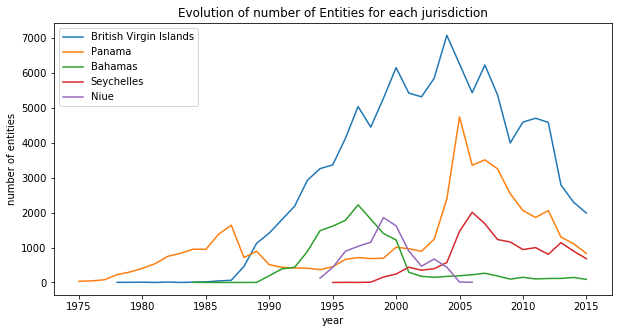

In [173]:
top5_jurisdiction = jurisdiction[:5].index.tolist()
jurisdiction_year = evolution_feature_year[evolution_feature_year['n.jurisdiction_description'].isin(top5_jurisdiction)][['n.incorporation_date','n.jurisdiction_description','count']]
jurisdiction_year = jurisdiction_year.groupby(['n.incorporation_date','n.jurisdiction_description']).count().reset_index()

plt.figure(figsize=(10,5))
for jd in top5_jurisdiction:
    data = jurisdiction_year[jurisdiction_year['n.jurisdiction_description']==jd]
    data = data[data['n.incorporation_date']>=1975]
    plt.plot(data['n.incorporation_date'],data['count'])

plt.legend(top5_jurisdiction)
plt.xlabel('year')
plt.ylabel('number of entities')
plt.title('Evolution of number of Entities for each jurisdiction')
plt.show()

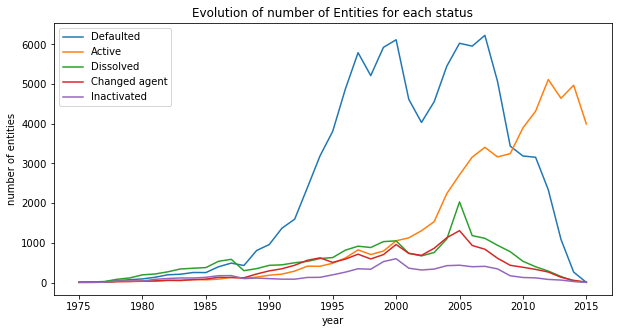

In [174]:
top5_status = status[:5].index.tolist()
status_year = evolution_feature_year[evolution_feature_year['n.status'].isin(top5_status)][['n.incorporation_date','n.status','count']]
status_year = status_year.groupby(['n.incorporation_date','n.status']).count().reset_index()

plt.figure(figsize=(10,5))
for st in top5_status:
    data = status_year[status_year['n.status']==st]
    data = data[data['n.incorporation_date']>=1975]
    plt.plot(data['n.incorporation_date'],data['count'])

plt.legend(top5_status)
plt.xlabel('year')
plt.ylabel('number of entities')
plt.title('Evolution of number of Entities for each status')
plt.show()

## Officer

In [12]:
panama_officer = pd.read_csv('./Data/panama_papers.nodes.officer.csv')

In [129]:
# no duplicated row
panama_officer[panama_officer.duplicated()==True].shape[0]

0

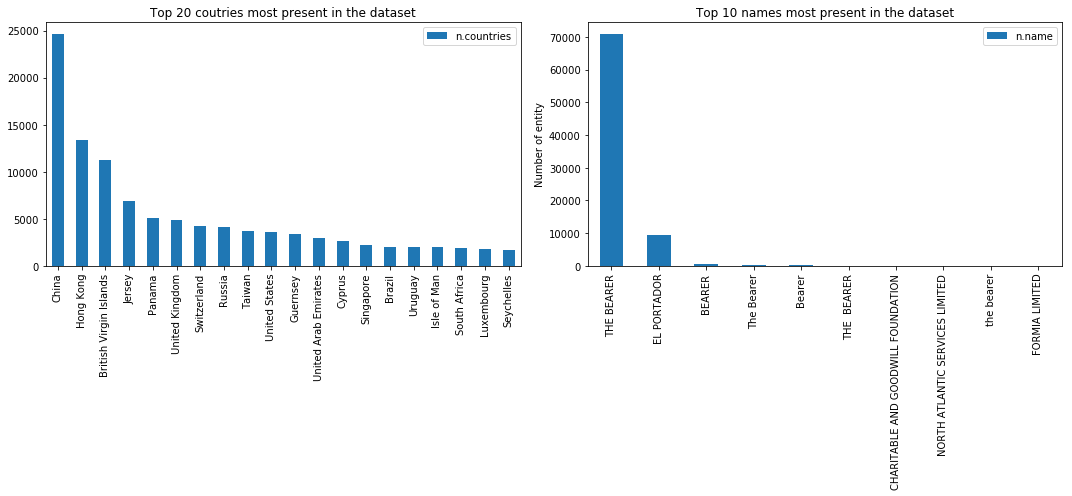

In [13]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,7))


countries = pd.DataFrame(panama_officer['n.countries'].value_counts())
countries[:20].plot(kind='bar',title='Top 20 coutries most present in the dataset',ax=axes[0])
plt.ylabel('Number of entity')

names = pd.DataFrame(panama_officer['n.name'].value_counts())
names[:10].plot(kind='bar',title='Top 10 names most present in the dataset',ax=axes[1])
plt.ylabel('Number of entity')

plt.tight_layout()

plt.show()

**The second plot is showing something weird with names "BEARER" & "EL PORTADOR" which lead us to some interresting facts...**

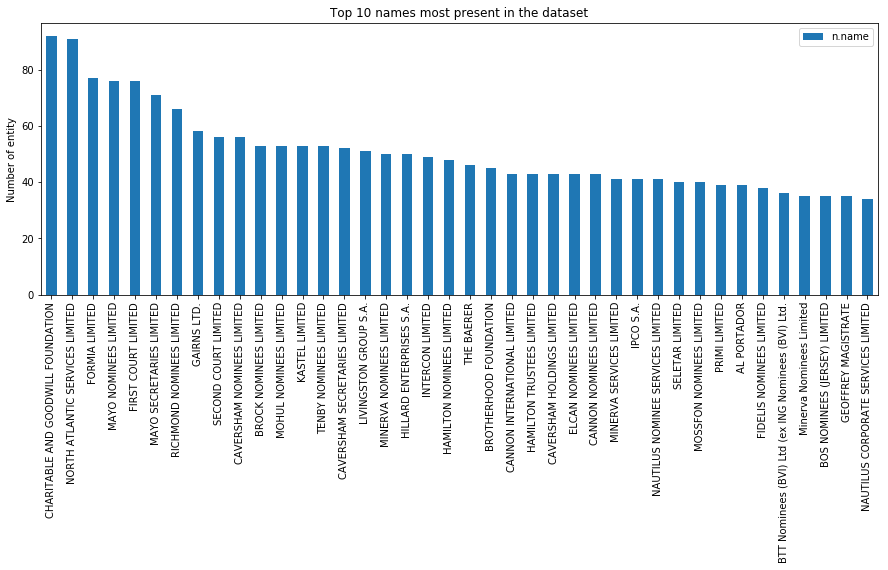

In [78]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(15,5), squeeze=False)

names = pd.DataFrame(panama_officer[panama_officer['n.name'].str.contains('bearer|EL PORTADOR', case=False) == False ]['n.name'].value_counts())
names[:40].plot(kind='bar',title='Top 10 names most present in the dataset',ax=axes[0,0])
plt.ylabel('Number of entity')

plt.show()

In [15]:
panama_officer[panama_officer['n.name'].str.contains('bearer', case=False) == True ]['n.name'].unique()

array(['THE BEARER', 'THE BEARER (MR. PAUL SPECK)', 'THE BEARER (EURO)',
       'BEARER', 'the bearer', 'TO BEARER', 'Bearer', 'BEARER01',
       'BEARER.', 'The Bearer', 'THE BEARERE', 'The bearer', 'THE  BEARER',
       'TO THE BEARER', 'to the bearer', 'BEARER3', 'BEARER2', 'BEARER1',
       'BEARER4',
       'INTERTRUST TRUSTEES LIMITD AS TRUSTEES OF THE BEARER TRUST',
       'THE BEARER1', 'BEARER 1', 'BEARER 2', 'BEARER 3', 'BEARER 4',
       'BEARER SHARES', 'THE BEARER SHARE', 'BEARER/ SHEERIN CADER',
       'BEARER/M-A-P SALEEM', 'BEARER/ AHAMED HILMY CADER',
       'BEARER (TO C/O CASITALINDA LTD.', 'BEARER WARRANT',
       'THE BEARER (holder María de los Ángeles P. de Krupp)',
       'THE BEARER (holder Ulrick Krupp)', 'BEARER A', 'BEARER B',
       'BEARER5', 'THE BEARER (IN FAVOUR OF NICHOLAS BLAKE REYNOLDS',
       'THE BEARER SUBCRIBER', 'THE BEARER2', 'BEARER SHARE', 'TEH BEARER',
       '-THE BEARER', 'THE, BEARER', 'THE BEARER.',
       'THE BEARER:AGENT DAVENHILL AS

## Intermediary 

In [24]:
panama_intermediary = pd.read_csv('./Data/panama_papers.nodes.intermediary.csv')

In [130]:
# no duplicated row
panama_intermediary[panama_intermediary.duplicated()==True].shape[0]

0

In [127]:
panama_intermediary.shape

(14110, 18)

In [128]:
panama_intermediary.head()

,labels(n),n.valid_until,n.country_codes,n.countries,n.node_id,n.sourceID,n.address,n.name,n.jurisdiction_description,n.service_provider,n.jurisdiction,n.closed_date,n.incorporation_date,n.ibcRUC,n.type,n.status,n.company_type,n.note
0,"[""Intermediary""]",The Panama Papers data is current through 2015,ZAF,South Africa,11000001,Panama Papers,MICHAEL PAPAGEORGE; MR. 106 NICHOLSON STREET B...,"MICHAEL PAPAGEORGE, MR.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,ACTIVE,NaN,NaN
1,"[""Intermediary""]",The Panama Papers data is current through 2015,LIE,Liechtenstein,11000002,Panama Papers,NaN,CORFIDUCIA ANSTALT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ACTIVE,NaN,NaN
2,"[""Intermediary""]",The Panama Papers data is current through 2015,MCO,Monaco,11000003,Panama Papers,NaN,"DAVID, RONALD",NaN,NaN,NaN,NaN,NaN,NaN,NaN,SUSPENDED,NaN,NaN
3,"[""Intermediary""]",The Panama Papers data is current through 2015,BEL,Belgium,11000004,Panama Papers,NaN,"DE BOUTSELIS, JEAN-PIERRE",NaN,NaN,NaN,NaN,NaN,NaN,NaN,SUSPENDED,NaN,NaN
4,"[""Intermediary""]",The Panama Papers data is current through 2015,LBN,Lebanon,11000005,Panama Papers,NaN,THE LEVANT LAWYERS (TLL),NaN,NaN,NaN,NaN,NaN,NaN,NaN,ACTIVE,NaN,NaN


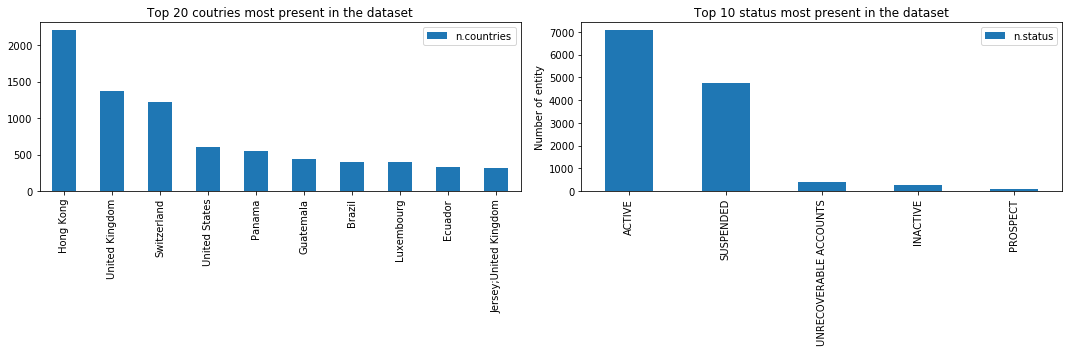

In [86]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))


countries = pd.DataFrame(panama_intermediary['n.countries'].value_counts())
countries[:10].plot(kind='bar',title='Top 20 coutries most present in the dataset',ax=axes[0])
plt.ylabel('Number of entity')

status = pd.DataFrame(panama_intermediary['n.status'].value_counts())
status[:5].plot(kind='bar',title='Top 10 status most present in the dataset',ax=axes[1])
plt.ylabel('Number of entity')

plt.tight_layout()

plt.show()

In [103]:
names = pd.DataFrame(panama_intermediary['n.name'].value_counts())
names[:10]

,n.name
DFM MANAGEMENT SAM,2
JOHNNY VÁSQUEZ GONZALEZ,2
CARL DAVID O´SHEA,2
CAREY COMMERCIAL LIMITED,2
MARCELA CAROLINA PAZ,2
ANDREAS AVEBONI,2
SWEIBEL NOVEK L.L.P.,2
NAUTILUS TRUST COMPANY LIMITED,2
"MASTELLARI, LUIS EDUARDO",2
CHARLES ALAN MONTE,2


## Adress

In [106]:
panama_adress = pd.read_csv('./Data/panama_papers.nodes.address.csv')

In [131]:
# no duplicated row
panama_adress[panama_adress.duplicated()==True].shape[0]

0

In [126]:
panama_adress.shape

(93454, 18)

In [125]:
panama_adress.head()

,labels(n),n.valid_until,n.country_codes,n.countries,n.node_id,n.sourceID,n.address,n.name,n.jurisdiction_description,n.service_provider,n.jurisdiction,n.closed_date,n.incorporation_date,n.ibcRUC,n.type,n.status,n.company_type,n.note
0,"[""Address""]",The Panama Papers data is current through 2015,SGP,Singapore,14000001,Panama Papers,-\t27 ROSEWOOD DRIVE #16-19 SINGAPORE 737920,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"[""Address""]",The Panama Papers data is current through 2015,KAZ,Kazakhstan,14000002,Panama Papers,"""Almaly Village"" v.5, Almaty Kazakhstan",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"[""Address""]",The Panama Papers data is current through 2015,GBR,United Kingdom,14000003,Panama Papers,"""Cantonia"" South Road St Georges Hill Weybridg...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"[""Address""]",The Panama Papers data is current through 2015,GGY,Guernsey,14000004,Panama Papers,"""CAY-OS"" NEW ROAD; ST.SAMPSON; GUERNSEY; CHANN...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"[""Address""]",The Panama Papers data is current through 2015,KEN,Kenya,14000005,Panama Papers,"""Chirag"" Plot No 652; Mwamba Road; Kizingo; Mo...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Edges 

In [333]:
panama_edges = pd.read_csv('./Data/panama_papers.edges.csv')

In [344]:
## Duplicated row: 8
panama_edges.drop(panama_edges[panama_edges.duplicated()==True].index,inplace=True)

* **Dataset Size:**
    * relations: 674094 
    * features: 7


* **'node_1':**  nodeId 1
* ** 'node_2':** nodeId 2
* ** 'r.sourceID':** Panama Papers
* ** 'r.valid_until':** The Panama Papers data is current through 2015
* **'rel_type': **relation type

In [346]:
panama_edges['rel_type'].unique()

array(['registered_address', 'intermediary_of', 'officer_of'], dtype=object)

In [335]:
panama_edges.head()

,node_1,rel_type,node_2,r.sourceID,r.valid_until,r.start_date,r.end_date
0,10000035,registered_address,14095990,Panama Papers,NaN,NaN,NaN
1,10000044,registered_address,14091035,Panama Papers,NaN,NaN,NaN
2,10000055,registered_address,14095990,Panama Papers,NaN,NaN,NaN
3,10000064,registered_address,14091429,Panama Papers,NaN,NaN,NaN
4,10000089,registered_address,14098253,Panama Papers,NaN,NaN,NaN


In [336]:
weird_date  = panama_edges['r.start_date'].dropna().apply(lambda x: x.split('-')[2]).astype(int) < 1900
index_weird_date = weird_date [weird_date  == True].index
panama_edges.ix[index_weird_date].head()

,node_1,rel_type,node_2,r.sourceID,r.valid_until,r.start_date,r.end_date
228844,12010651,officer_of,10034573,Panama Papers,The Panama Papers data is current through 2015,18-JUN-0082,07-APR-2005
229514,12011199,officer_of,10034573,Panama Papers,The Panama Papers data is current through 2015,18-JUN-0082,07-APR-2005
232296,12013401,officer_of,10180308,Panama Papers,The Panama Papers data is current through 2015,04-JAN-0200,25-JUN-2001
239696,12019679,officer_of,10026442,Panama Papers,The Panama Papers data is current through 2015,28-OCT-0200,NaN
246608,12025977,officer_of,10192685,Panama Papers,The Panama Papers data is current through 2015,27-MAY-0202,28-SEP-2010


In [337]:
panama_edges['r.start_date']  = panama_edges['r.start_date'].str.replace('0012','2012')
panama_edges['r.start_date']  = panama_edges['r.start_date'].str.replace('0014','2014')
panama_edges['r.start_date']  = panama_edges['r.start_date'].str.replace('0003','2003')
panama_edges['r.start_date']  = panama_edges['r.start_date'].str.replace('0082','1982')
panama_edges['r.start_date']  = panama_edges['r.start_date'].str.replace('0200','2000')
panama_edges['r.start_date']  = panama_edges['r.start_date'].str.replace('0202','2002')
panama_edges['r.start_date']  = panama_edges['r.start_date'].str.replace('0203','2003')
panama_edges['r.start_date']  = panama_edges['r.start_date'].str.replace('2500','2005')
panama_edges['r.start_date']  = panama_edges['r.start_date'].str.replace('1194','1994')
panama_edges['r.start_date']  = panama_edges['r.start_date'].str.replace('0199','1999')
panama_edges['r.start_date']  = panama_edges['r.start_date'].str.replace('0015','2015')
panama_edges['r.start_date']  = panama_edges['r.start_date'].str.replace('0009','2009')
panama_edges['r.start_date']  = panama_edges['r.start_date'].str.replace('0006','2006')
panama_edges['r.start_date']  = panama_edges['r.start_date'].str.replace('0201','2001')
panama_edges['r.start_date']  = panama_edges['r.start_date'].str.replace('0095','1995')
panama_edges['r.start_date']  = panama_edges['r.start_date'].str.replace('0004','2004')
panama_edges['r.start_date']  = panama_edges['r.start_date'].str.replace('0213','2013')
panama_edges['r.start_date']  = panama_edges['r.start_date'].str.replace('0096','1996')
panama_edges['r.start_date']  = panama_edges['r.start_date'].str.replace('0214','2014')
panama_edges['r.start_date']  = panama_edges['r.start_date'].str.replace('0011','2011')
panama_edges['r.start_date']  = panama_edges['r.start_date'].str.replace('0206','2006')

# We also checked the incoherence between start_date and end_date,
#for exp: 'r.start_date': 18-MAR-2019 & 'r.end_date': 06-OCT-2009 
#         means that start_date was probably in year 2009 instead of 2019
panama_edges['r.start_date']  = panama_edges['r.start_date'].str.replace('2088','2008')
panama_edges['r.start_date']  = panama_edges['r.start_date'].str.replace('2019','2009')
panama_edges['r.start_date']  = panama_edges['r.start_date'].str.replace('2020','2002')
panama_edges['r.start_date']  = panama_edges['r.start_date'].str.replace('2099','2009')
panama_edges['r.start_date']  = panama_edges['r.start_date'].str.replace('2201','2001')
panama_edges['r.start_date']  = panama_edges['r.start_date'].str.replace('2205','2005')

In [338]:
weird_date  = panama_edges['r.end_date'].dropna().apply(lambda x: x.split('-')[2]).astype(int) < 1900
index_weird_date = weird_date [weird_date  == True].index
panama_edges.ix[index_weird_date].head()

,node_1,rel_type,node_2,r.sourceID,r.valid_until,r.start_date,r.end_date
271446,12048615,officer_of,10150924,Panama Papers,The Panama Papers data is current through 2015,11-JUN-2002,06-NOV-0009
271447,12048616,officer_of,10150924,Panama Papers,The Panama Papers data is current through 2015,11-JUN-2002,06-NOV-0009
271467,12048617,officer_of,10150924,Panama Papers,The Panama Papers data is current through 2015,11-JUN-2002,06-NOV-0009
271468,12048618,officer_of,10150924,Panama Papers,The Panama Papers data is current through 2015,11-JUN-2002,06-NOV-0009
271469,12048619,officer_of,10150924,Panama Papers,The Panama Papers data is current through 2015,11-JUN-2002,06-NOV-0009


In [339]:
panama_edges['r.end_date']  = panama_edges['r.end_date'].str.replace('0213','2013')
panama_edges['r.end_date']  = panama_edges['r.end_date'].str.replace('0206','2006')
panama_edges['r.end_date']  = panama_edges['r.end_date'].str.replace('0012','2012')
panama_edges['r.end_date']  = panama_edges['r.end_date'].str.replace('0200','2000')
panama_edges['r.end_date']  = panama_edges['r.end_date'].str.replace('0201','2001')
panama_edges['r.end_date']  = panama_edges['r.end_date'].str.replace('0015','2015')
panama_edges['r.end_date']  = panama_edges['r.end_date'].str.replace('0199','1999')
panama_edges['r.end_date']  = panama_edges['r.end_date'].str.replace('0208','2008')
panama_edges['r.end_date']  = panama_edges['r.end_date'].str.replace('0006','2006')
panama_edges['r.end_date']  = panama_edges['r.end_date'].str.replace('0009','2009')
panama_edges['r.end_date']  = panama_edges['r.end_date'].str.replace('0213','2013')

panama_edges['r.end_date']  = panama_edges['r.end_date'].str.replace('2209','2009')

In [340]:
## Convert feature:'r.start_date' & 'r.end_date' to type date
panama_edges['r.start_date'] = pd.to_datetime(panama_edges['r.start_date'])
panama_edges['r.end_date'] = pd.to_datetime(panama_edges['r.end_date'])

   * ** 'r.star_date':** years between ['1957','2015']
   * ** 'r.end_date':** years beatween ['1959','2020']